#Customer churn Analysis & Prediction
## Problem Statement
Customer churn refers to customers who stop using a company's product or high curn negatively impacts revenue and growth.

The goal of this project is to analyze customer behaviour data and build model to identify customers likely to churn, helping businesses take proactive retention measures.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [10]:
df = pd.read_csv('Telco-Customer-Churn.csv')  # Load the dataset
df.head()




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##Exploring data set


In [11]:
df.shape


(7043, 21)

Columns
customerid, age,partner, phone services

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Mean tenure - avg customer stays like ~2.7yrs
mean monthly charges-64.76
senior citizen mean-16%


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
print(df['Churn'].value_counts())
df['Churn'].value_counts(normalize=True)  # Proportion of each class

df.groupby('Churn')['tenure'].mean()
df.groupby('Churn')['gender'].value_counts()



Churn
No     5174
Yes    1869
Name: count, dtype: int64


Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: count, dtype: int64

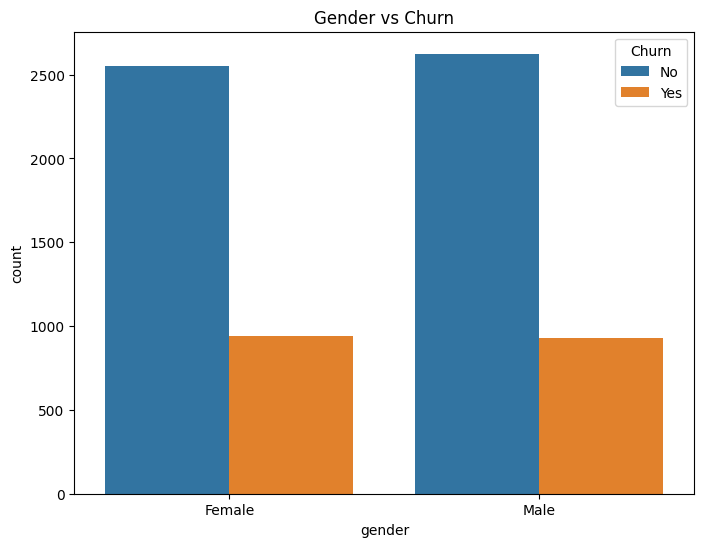

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs Churn')
plt.show()

In [16]:
print(df['gender'].value_counts())
print(df['Contract'].value_counts())


gender
Male      3555
Female    3488
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


In [17]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Data cleaning

In [18]:
# #drop customerID column as it is not useful for prediction
# if 'customerID' in df.columns:
#     df.drop('customerID', axis=1, inplace=True)
# #drop duplicarte rows if any
# df.drop_duplicates(inplace=True)
# #convert total charges to numeric, coerce errors to NaN


print(";;;;;Before Cleaning;;;;;")
print(f"Shape: {df.shape}")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Missing values:\n{df.isnull().sum()}")

if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

#drop duplicarte rows if any
df.drop_duplicates(inplace=True)


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#fill NaN values in TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


print(";;;;;After Cleaning;;;;;")
print(f"Shape: {df.shape}")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Missing values:\n{df.isnull().sum()}")
print("Completed data cleaning.")

;;;;;Before Cleaning;;;;;
Shape: (7043, 21)
Duplicates: 0
Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
;;;;;After Cleaning;;;;;
Shape: (7021, 20)
Duplicates: 0
Missing values:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Mont

C:\Users\singl\AppData\Local\Temp\ipykernel_10624\441281218.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


##EDA


the given plot shows avg staying period for customers is 37 months and newer customer are more likely to churn than long-term customers.


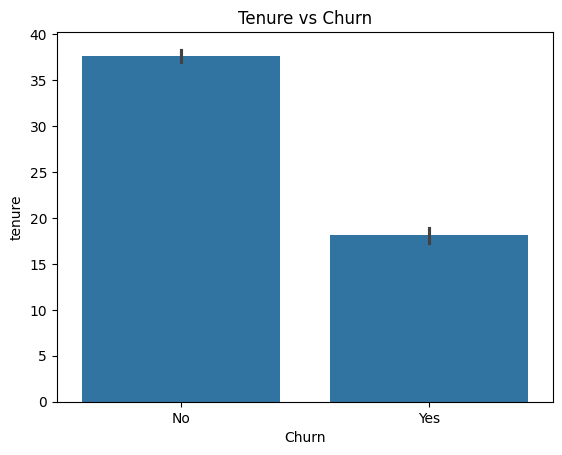

In [24]:
sns.barplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

the given plot shows customers who pay in the rannge of 30-90 are likely to stay than those who pay bills minimum 80 are likey to churn 


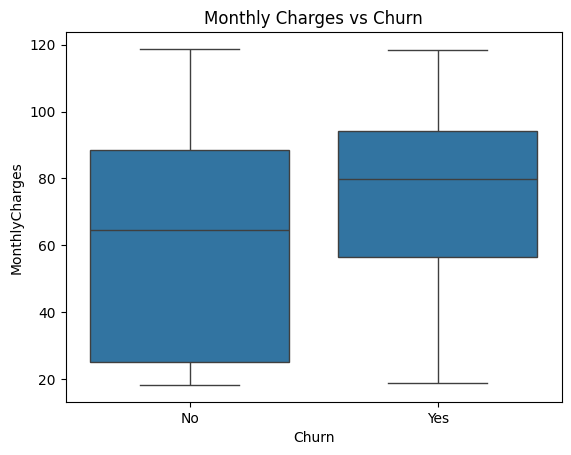

In [26]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

Customers on month-to-month contracts with higher monthly charges are more likely to churn.
Although customers on one-year and two-year contracts who churn also have higher charges, long-term contracts are generally associated with better retention.


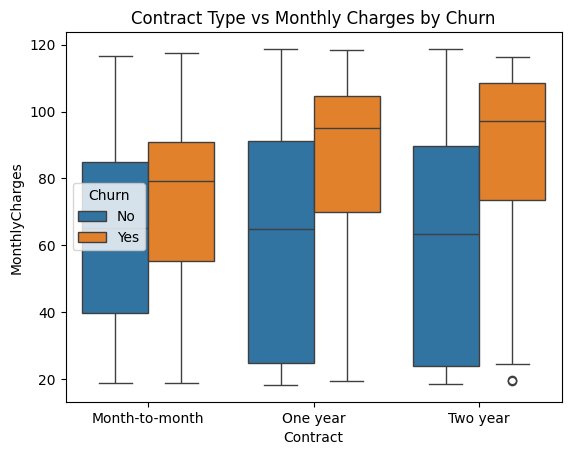

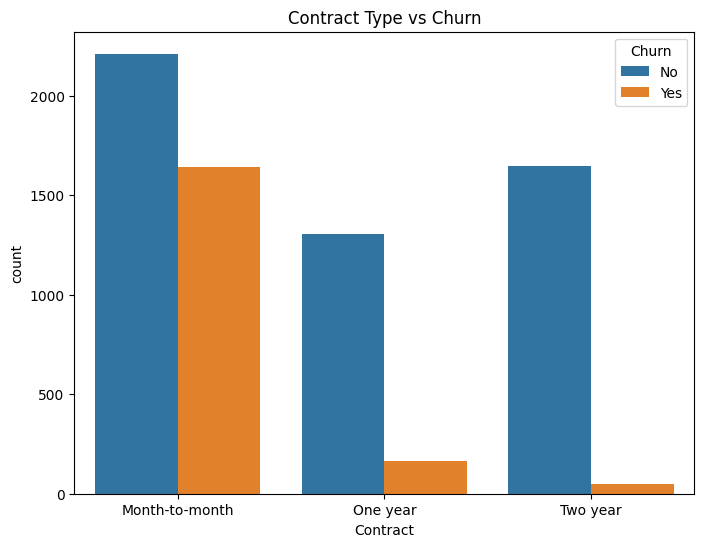

In [28]:
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Contract Type vs Monthly Charges by Churn')
plt.show()
plt.figure(figsize=(8,6))

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()


month to month contarct have higher risk of customer churn rate as compared to long term contracts 
Although long-term contracts show lower observed churn, customers may remain due
to contractual restrictions rather than satisfaction, indicating suppressed churn risk.


In [29]:
df.groupby(['Churn','Contract'])['MonthlyCharges'].mean()


Churn  Contract      
No     Month-to-month    61.649887
       One year          62.508148
       Two year          60.012477
Yes    Month-to-month    73.193214
       One year          85.050904
       Two year          86.777083
Name: MonthlyCharges, dtype: float64

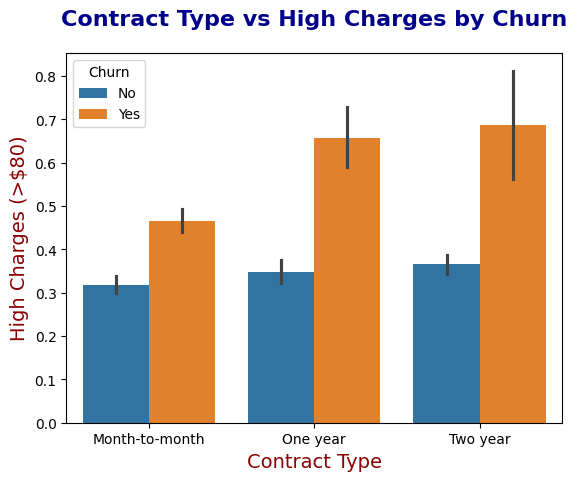

In [47]:
df['HighCharges']=df['MonthlyCharges']>80
pd.crosstab([df['Contract'],df['HighCharges']],df['Churn'],normalize='index')
sns.barplot(x='Contract', y='HighCharges', hue='Churn', data=df)
plt.title('Contract Type vs High Charges by Churn',
          fontsize=16,
          fontweight='bold',
          color='darkblue', pad=20)

plt.xlabel('Contract Type', fontsize=14, color='darkred')
plt.ylabel('High Charges (>$80)', fontsize=14, color='darkred')
plt.show()



Identified suppressed churn behavior by analyzing contract duration and pricing.
Customers with high monthly charges show significantly higher churn rates across
all contract types, indicating delayed churn due to contractual lock-in rather than
true customer loyalty.


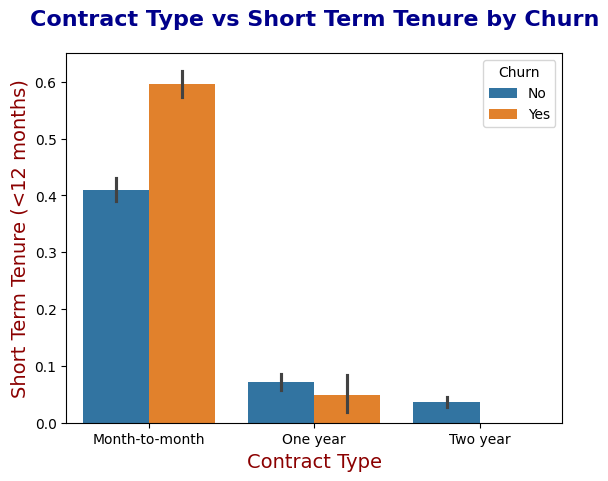

In [41]:
df['ShortTerm']=df['tenure']<12
pd.crosstab([df['Contract'],df['ShortTerm']],df['Churn'],normalize='index')
sns.barplot(x='Contract',y='ShortTerm', hue='Churn', data=df)
plt.title('Contract Type vs Short Term Tenure by Churn',
          fontsize=16,
          fontweight='bold',
          color='darkblue', pad=20)

plt.xlabel('Contract Type', fontsize=14, color='darkred')
plt.ylabel('Short Term Tenure (<12 months)', fontsize=14, color='darkred')
plt.show()


##Focused engineering